In [1]:
import numpy as np
import time
import pandas as pd

In [2]:
rf_path = "./rt-ifttt/rt-ifttt.csv"
rf_data = pd.read_csv(rf_path)

In [3]:
rf_data

Unnamed: 0  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0              0       4.21           51624.113281                 30.68   
1              1       4.20           51675.531250                 30.63   
2              2       4.24           52035.460938                 30.76   
3              3       4.23           51984.042969                 30.75   
4              4       4.24           51881.207031                 30.87   
...          ...        ...                    ...                   ...   
9995        9995       0.73            9101.063477                 20.71   
9996        9996       0.74            9101.063477                 20.72   
9997        9997       0.74            9049.645508                 20.73   
9998        9998       0.74            9101.063477                 20.73   
9999        9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  \
0               925.531921                27.26           33.154297   
1               771.276611                27.26           33.232422   
2               668.439697                27.29           33.145508   
3               617.021301                27.30           33.145508   
4               617.021301                27.29           33.123047   
...                    ...                  ...                 ...   
9995            565.602844                27.24           30.381836   
9996            617.021301                27.24           30.392578   
9997            565.602844                27.24           30.381836   
9998            565.602844                27.24           30.415039   
9999            668.439697                27.25           30.282227   

      IndoorPressure_hPa  
0                1011.81  
1                1011.79  
2                1011.78  
3                1011.78  
4                1011.72  
...                  ...  
9995             1012.20  
9996             1012.15  
9997             1012.18  
9998             1012.18  
9999             1012.11  

[10000 rows x 11 columns]

In [4]:
print("检查每一列是否存在空值：")
print(rf_data.isna().any())

检查每一列是否存在空值：
Unnamed: 0               False
OutdoorUV                False
OutdoorVisibleRay_Lux    False
OutdoorTemperature_C     False
OutdoorHumidity_pct      False
OutdoorPressure_hPa      False
IndoorUV                 False
IndoorVisibleRay_Lux     False
IndoorTemperature_C      False
IndoorHumidity_pct       False
IndoorPressure_hPa       False
dtype: bool


In [5]:
weather_humidity_path = "./Historical Hourly Weather Data 2012-2017/humidity.csv"
weather_pressure_path = "./Historical Hourly Weather Data 2012-2017/pressure.csv"
weather_temperature_path = "./Historical Hourly Weather Data 2012-2017/temperature.csv"
weather_wind_speed_path = "./Historical Hourly Weather Data 2012-2017/wind_speed.csv"
weather_humidity_data = pd.read_csv(weather_humidity_path)
weather_pressure_data = pd.read_csv(weather_pressure_path)
weather_temperature_data = pd.read_csv(weather_temperature_path)
weather_wind_speed_data = pd.read_csv(weather_wind_speed_path)
weather_data = [weather_humidity_data, weather_pressure_data, weather_temperature_data, weather_wind_speed_data]

In [6]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver             True
Portland              True
San Francisco         True
Seattle               True
Los Angeles           True
San Diego             True
Las Vegas             True
Phoenix               True
Albuquerque           True
Denver                True
San Antonio           True
Dallas                True
Houston               True
Kansas City           True
Minneapolis           True
Saint Louis           True
Chicago               True
Nashville             True
Indianapolis          True
Atlanta               True
Detroit               True
Jacksonville          True
Charlotte             True
Miami                 True
Pittsburgh            True
Toronto               True
Philadelphia          True
New York              True
Montreal              True
Boston                True
Beersheba             True
Tel Aviv District     True
Eilat                 True
Haifa                 True
Nahariyya             True
Jerusa

In [7]:
for dataset in weather_data:
    for col_name in dataset.columns:
        # 处理空值
        if dataset[col_name].isnull().any():
            # 用平均值填充
            dataset.fillna({col_name: int(dataset[col_name].mean())}, inplace=True)

In [8]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver            False
Portland             False
San Francisco        False
Seattle              False
Los Angeles          False
San Diego            False
Las Vegas            False
Phoenix              False
Albuquerque          False
Denver               False
San Antonio          False
Dallas               False
Houston              False
Kansas City          False
Minneapolis          False
Saint Louis          False
Chicago              False
Nashville            False
Indianapolis         False
Atlanta              False
Detroit              False
Jacksonville         False
Charlotte            False
Miami                False
Pittsburgh           False
Toronto              False
Philadelphia         False
New York             False
Montreal             False
Boston               False
Beersheba            False
Tel Aviv District    False
Eilat                False
Haifa                False
Nahariyya            False
Jerusa

In [9]:
bridge_21416_DPM_path = "./2021-04-16/2021-04-16 00-DPM.csv"
bridge_21416_HPT_path = "./2021-04-16/2021-04-16 00-HPT.csv"
bridge_21416_RHS_path = "./2021-04-16/2021-04-16 00-RHS.csv"
bridge_21416_ULT_path = "./2021-04-16/2021-04-16 00-ULT.csv"
bridge_21416_VIB_path = "./2021-04-16/2021-04-16 00-VIB.csv"
bridge_21416_VIC_path = "./2021-04-16/2021-04-16 00-VIC.csv"
bridge_21416_DPM_data = pd.read_csv(bridge_21416_DPM_path)
bridge_21416_HPT_data = pd.read_csv(bridge_21416_HPT_path)
bridge_21416_RHS_data = pd.read_csv(bridge_21416_RHS_path)
bridge_21416_ULT_data = pd.read_csv(bridge_21416_ULT_path)
bridge_21416_VIB_data = pd.read_csv(bridge_21416_VIB_path)
bridge_21416_VIC_data = pd.read_csv(bridge_21416_VIC_path)

bridge_data = [bridge_21416_DPM_data, bridge_21416_HPT_data, bridge_21416_RHS_data, bridge_21416_ULT_data, bridge_21416_VIB_data,bridge_21416_VIC_data]

In [10]:
for idx, dataset in enumerate(bridge_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
00:00:00.000    False
 103.761        False
 101.761        False
Unnamed: 3       True
dtype: bool
检查第 1 个数据集的每一列是否存在空值：
00:00:00.000    False
4854.628        False
4799.306        False
3366.273        False
3323.542        False
2026.681        False
1960.522        False
1204.850        False
1158.819        False
1637.626        False
1566.018        False
 960.728        False
 929.909        False
Unnamed: 13      True
dtype: bool
检查第 2 个数据集的每一列是否存在空值：
00:00:00.000    False
  24.478        False
  48.877        False
  24.611        False
  55.545        False
  24.291        False
  42.173        False
  24.401        False
  43.895        False
  24.864        False
  78.694        False
  24.850        False
  78.495        False
Unnamed: 13      True
dtype: bool
检查第 3 个数据集的每一列是否存在空值：
00:00:00.000    False
   5.629        False
 370.062        False
Unnamed: 3       True
dtype: bool
检查第 4 个数据集的每一列是否存在空值：
00:00:00.000    False
  -0.387        False
   0.4

In [11]:
for idx in range(len(weather_data)):
    weather_data[idx] = weather_data[idx].drop(weather_data[idx].columns[0], axis=1)

In [12]:
weather_data[0]

Vancouver  Portland  San Francisco  Seattle  Los Angeles  San Diego  \
0           81.0      74.0           76.0     77.0         62.0       67.0   
1           76.0      81.0           88.0     81.0         88.0       82.0   
2           76.0      80.0           87.0     80.0         88.0       81.0   
3           76.0      80.0           86.0     80.0         88.0       81.0   
4           77.0      80.0           85.0     79.0         88.0       81.0   
...          ...       ...            ...      ...          ...        ...   
45248       81.0      81.0           76.0     93.0         24.0       72.0   
45249       81.0      71.0           76.0     87.0         21.0       72.0   
45250       81.0      71.0           76.0     93.0         23.0       68.0   
45251       81.0      71.0           76.0     87.0         14.0       63.0   
45252       81.0      76.0           76.0     75.0         56.0       72.0   

       Las Vegas  Phoenix  Albuquerque  Denver  ...  Philadelphia  New York  \
0           31.0     37.0         45.0    53.0  ...          68.0      66.0   
1           22.0     23.0         50.0    62.0  ...          71.0      58.0   
2           21.0     23.0         49.0    62.0  ...          70.0      57.0   
3           21.0     23.0         49.0    62.0  ...          70.0      57.0   
4           21.0     23.0         49.0    62.0  ...          69.0      57.0   
...          ...      ...          ...     ...  ...           ...       ...   
45248       18.0     68.0         37.0    18.0  ...          27.0      66.0   
45249       18.0     73.0         34.0    12.0  ...          29.0      66.0   
45250       17.0     60.0         32.0    15.0  ...          31.0      66.0   
45251       17.0     33.0         30.0    28.0  ...          26.0      66.0   
45252       17.0     23.0         34.0    31.0  ...          32.0      66.0   

       Montreal  Boston  Beersheba  Tel Aviv District  Eilat  Haifa  \
0          71.0    77.0       70.0               66.0   25.0   79.0   
1          93.0    68.0       50.0               63.0   22.0   51.0   
2          91.0    68.0       51.0               62.0   22.0   51.0   
3          87.0    68.0       51.0               62.0   22.0   51.0   
4          84.0    68.0       52.0               62.0   22.0   51.0   
...         ...     ...        ...                ...    ...    ...   
45248      64.0    37.0       70.0               66.0   53.0   79.0   
45249      59.0    74.0       70.0               66.0   53.0   79.0   
45250      66.0    74.0       70.0               66.0   53.0   79.0   
45251      58.0    56.0       70.0               66.0   53.0   79.0   
45252      58.0    56.0       70.0               66.0   53.0   79.0   

       Nahariyya  Jerusalem  
0           78.0       68.0  
1           51.0       50.0  
2           51.0       50.0  
3           51.0       50.0  
4           51.0       50.0  
...          ...        ...  
45248       78.0       68.0  
45249       78.0       68.0  
45250       78.0       68.0  
45251       78.0       68.0  
45252       78.0       68.0  

[45253 rows x 36 columns]

In [13]:
weather_data_list = ["_humidity", "_pressure", "_temperature", "_wind_speed"]
for idx_dataset in range(len(weather_data)):   
    for idx in range(len(weather_data[idx_dataset].columns)):
        weather_data[idx_dataset].columns.values[idx] += weather_data_list[idx_dataset]

In [14]:
data_aggregated = pd.concat([rf_data], axis=1)
data_aggregated.columns.values[0] = "Timestamp"

In [15]:
data_aggregated

Timestamp  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0             0       4.21           51624.113281                 30.68   
1             1       4.20           51675.531250                 30.63   
2             2       4.24           52035.460938                 30.76   
3             3       4.23           51984.042969                 30.75   
4             4       4.24           51881.207031                 30.87   
...         ...        ...                    ...                   ...   
9995       9995       0.73            9101.063477                 20.71   
9996       9996       0.74            9101.063477                 20.72   
9997       9997       0.74            9049.645508                 20.73   
9998       9998       0.74            9101.063477                 20.73   
9999       9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  \
0               925.531921                27.26           33.154297   
1               771.276611                27.26           33.232422   
2               668.439697                27.29           33.145508   
3               617.021301                27.30           33.145508   
4               617.021301                27.29           33.123047   
...                    ...                  ...                 ...   
9995            565.602844                27.24           30.381836   
9996            617.021301                27.24           30.392578   
9997            565.602844                27.24           30.381836   
9998            565.602844                27.24           30.415039   
9999            668.439697                27.25           30.282227   

      IndoorPressure_hPa  
0                1011.81  
1                1011.79  
2                1011.78  
3                1011.78  
4                1011.72  
...                  ...  
9995             1012.20  
9996             1012.15  
9997             1012.18  
9998             1012.18  
9999             1012.11  

[10000 rows x 11 columns]

In [16]:
for idx in range(len(weather_data)):
    data_aggregated = pd.concat([data_aggregated, weather_data[idx].head(10000)], axis=1)

In [17]:
data_aggregated

Timestamp  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0             0       4.21           51624.113281                 30.68   
1             1       4.20           51675.531250                 30.63   
2             2       4.24           52035.460938                 30.76   
3             3       4.23           51984.042969                 30.75   
4             4       4.24           51881.207031                 30.87   
...         ...        ...                    ...                   ...   
9995       9995       0.73            9101.063477                 20.71   
9996       9996       0.74            9101.063477                 20.72   
9997       9997       0.74            9049.645508                 20.73   
9998       9998       0.74            9101.063477                 20.73   
9999       9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  ...  \
0               925.531921                27.26           33.154297  ...   
1               771.276611                27.26           33.232422  ...   
2               668.439697                27.29           33.145508  ...   
3               617.021301                27.30           33.145508  ...   
4               617.021301                27.29           33.123047  ...   
...                    ...                  ...                 ...  ...   
9995            565.602844                27.24           30.381836  ...   
9996            617.021301                27.24           30.392578  ...   
9997            565.602844                27.24           30.381836  ...   
9998            565.602844                27.24           30.415039  ...   
9999            668.439697                27.25           30.282227  ...   

      Philadelphia_wind_speed  New York_wind_speed  Montreal_wind_speed  \
0                         2.0                  3.0                  3.0   
1                         4.0                  7.0                  4.0   
2                         4.0                  7.0                  4.0   
3                         3.0                  7.0                  4.0   
4                         3.0                  7.0                  4.0   
...                       ...                  ...                  ...   
9995                      3.0                  3.0                  2.0   
9996                      3.0                  3.0                  2.0   
9997                      3.0                  3.0                  1.0   
9998                      3.0                  3.0                  1.0   
9999                      3.0                  3.0                  6.0   

      Boston_wind_speed  Beersheba_wind_speed  Tel Aviv District_wind_speed  \
0                   3.0                   1.0                           2.0   
1                   3.0                   1.0                           0.0   
2                   3.0                   3.0                           0.0   
3                   3.0                   3.0                           0.0   
4                   3.0                   3.0                           0.0   
...                 ...                   ...                           ...   
9995             

In [18]:
data_aggregated.shape[0]

10000

In [564]:
import numpy as np
from scipy.stats import truncnorm

# 定义截断正态分布
def truncated_normal(mean, std_dev, low, high):
    a = (low - mean) / std_dev
    b = (high - mean) / std_dev
    return truncnorm(a, b, loc=mean, scale=std_dev)

def generateQuery(num_queries, time_value_max, device_value_max):
    # 采用 10000个时间点导致建图开销过于庞大，先用1000个时间点，20个设备
    # 构建一个拥有1000 * 20 = 20000 个节点的无向图，生成100个query对权重进行迭代
    time_low, time_high = 1, time_value_max
    device_low, device_high = 1, device_value_max

    query_time_length_mu = 3
    query_time_length_sigma = 1 

    query_device_length_mu = 3
    query_device_length_sigma = 1  
    queries = []
    
    def is_overlap_points_less_enough(time_lower_bound, time_upper_bound, device_lower_bound, device_upper_bound, queries, min_points):
        for (q_t_l, q_t_u), (q_d_l, q_d_u) in queries:
            if time_lower_bound >= q_t_u or time_upper_bound <= q_t_l or device_upper_bound <= q_d_l or device_lower_bound >= q_d_u:
                continue
            else:
                time_delta = min(abs(time_upper_bound - q_t_l), abs(time_upper_bound - time_lower_bound), abs(time_lower_bound - q_t_u), abs(q_t_l - q_t_u))
                device_delta = min(abs(device_upper_bound - q_d_l), abs(device_upper_bound - q_d_u), abs(device_upper_bound - device_lower_bound), abs(q_d_l - q_d_u))
                if (time_delta + 1) * (device_delta + 1) > min_points:
                    return False
        return True
    
    for _ in range(num_queries):
        bounds = []
        while(True):
            # 要使得中心之间的距离尽可能隔远一些
            # 参数设置
            tried = 0
            mean = (time_low + time_high) / 2
            std_dev = (time_high - time_low) / 6  # 经验法则：99.7%的数据在3个标准差内
            # 生成time_center
            time_center = round(truncated_normal(mean, std_dev, time_low, time_high).rvs())
            # print(f"time_center: {time_center}")
            time_length = abs(np.random.normal(query_time_length_mu, query_time_length_sigma))
            # print(f"time_length: {time_length}")
            time_lower_bound = round(max(time_low, time_center - time_length / 2))
            time_upper_bound = round(min(time_high, time_center + time_length / 2))
            '''if time_lower_bound < time_low:
                time_lower_bound = time_low
            if time_upper_bound > time_high:
                time_upper_bound = time_high'''
            
            mean = (device_low + device_high) / 2
            std_dev = (device_high - device_low) / 6  # 经验法则：99.7%的数据在3个标准差内
            # 生成time_center
            device_center = round(truncated_normal(mean, std_dev, device_low, device_high).rvs())
            # device_length = abs(np.random.normal(query_device_length_mu, query_device_length_sigma))
            device_length = round(9 / time_length)
            device_lower_bound = round(max(device_low, device_center - device_length / 2))
            device_upper_bound = round(min(device_high, device_center + device_length / 2))
            '''if device_upper_bound > device_high:
                device_upper_bound = device_high
            if device_lower_bound < device_low:
                device_lower_bound = device_low'''
            
            area = (time_upper_bound - time_lower_bound + 1) * (device_upper_bound - device_lower_bound + 1)
            tried += 1
            if 5 <= area <= 10 and time_length >= 3 and is_overlap_points_less_enough(time_lower_bound, time_upper_bound, device_lower_bound, device_upper_bound, queries, 2):
                bounds = [(time_lower_bound, time_upper_bound), (device_lower_bound, device_upper_bound)]
                break
            if tried == 20:
                print(f"try {tried} times.")
        queries.append(bounds)
    return queries

In [565]:
# 建图
import networkx as nx
# 创建一个空的无向图
G = nx.Graph()

time_value_max = 20
device_value_max = 20
batch_size = 10
num_nodes = time_value_max * device_value_max
G.add_nodes_from(range(num_nodes))

In [566]:
IF = 2
num_queries = round(time_value_max * device_value_max / batch_size / IF)
query_set = generateQuery(num_queries, time_value_max, device_value_max)

In [567]:
query_set

[[(6, 12), (14, 14)],
 [(4, 10), (6, 6)],
 [(9, 15), (8, 8)],
 [(18, 20), (9, 11)],
 [(1, 3), (16, 18)],
 [(10, 16), (10, 10)],
 [(1, 3), (10, 12)],
 [(7, 13), (12, 12)],
 [(12, 18), (6, 6)],
 [(18, 20), (11, 13)],
 [(5, 9), (1, 2)],
 [(8, 14), (8, 8)],
 [(1, 3), (12, 14)],
 [(11, 17), (8, 8)],
 [(18, 20), (14, 16)],
 [(4, 10), (8, 8)],
 [(9, 13), (1, 2)],
 [(7, 13), (16, 16)],
 [(8, 12), (19, 20)],
 [(4, 10), (8, 8)]]

In [568]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 400
Number of edges: 0


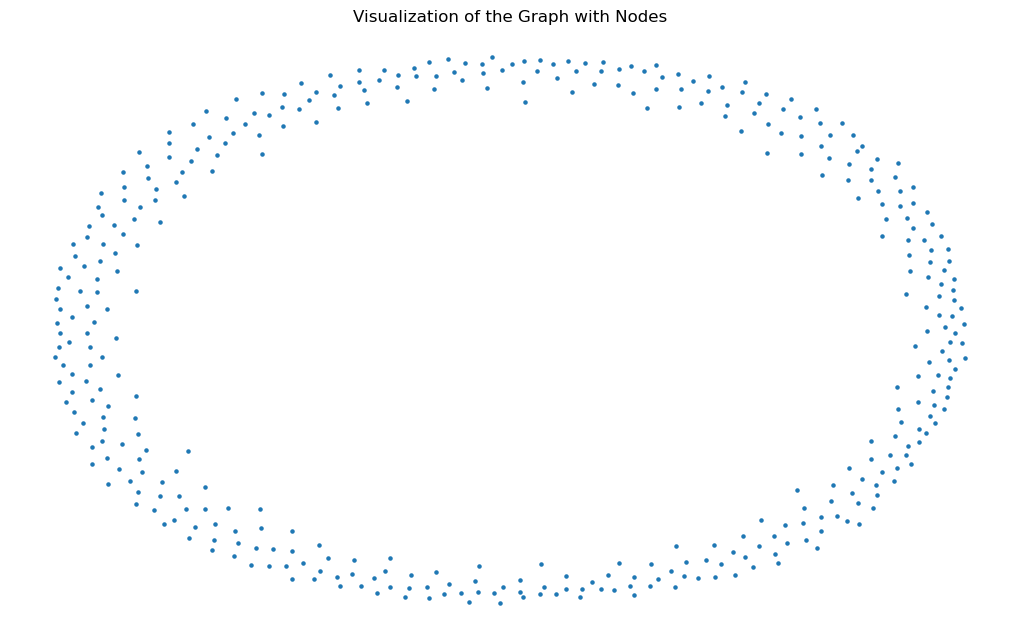

In [569]:
import matplotlib.pyplot as plt
import scipy
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with Nodes")
plt.show()

In [570]:
vTime, vDevice = 1, 1
count = 0
for node in G.nodes():
    # 为每个节点添加两个属性值
    nx.set_node_attributes(G, {node: {'timestamp': vTime, 'device_id': vDevice}})
    count += 1
    if vDevice <= device_value_max:
        if vDevice == device_value_max:
            vDevice = 1
            vTime += 1
        else:
            vDevice += 1

In [571]:
import math
def init_edge_weights(G):
    count = 0
    zero_count = 0
    # 必须加上data=True才可以迭代
    for u, u_attrs in G.nodes(data=True):
        for v, v_attrs in G.nodes(data=True):
            if u != v:
                # 计算边的权重为两个节点的 timestamp 和 device_id 分别作差后的平方和
                weight = round(math.sqrt((u_attrs['timestamp'] - v_attrs['timestamp']) ** 2 + (u_attrs['device_id'] - v_attrs['device_id']) ** 2))
                if weight == 0:
                    zero_count += 1
                # 添加边到图中，并附带权重信息
                G.add_edge(u, v, weight=weight)
                count += 1
    print(count)
    print(zero_count)
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

In [572]:
init_edge_weights(G)

159600
0
Number of nodes: 400
Number of edges: 79800


In [573]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 400
Number of edges: 79800


In [574]:
for u, v, attrs in G.edges(data=True):
    print("Edge:", u, "-", v, ", Weight:", attrs['weight'])

Edge: 0 - 1 , Weight: 1
Edge: 0 - 2 , Weight: 2
Edge: 0 - 3 , Weight: 3
Edge: 0 - 4 , Weight: 4
Edge: 0 - 5 , Weight: 5
Edge: 0 - 6 , Weight: 6
Edge: 0 - 7 , Weight: 7
Edge: 0 - 8 , Weight: 8
Edge: 0 - 9 , Weight: 9
Edge: 0 - 10 , Weight: 10
Edge: 0 - 11 , Weight: 11
Edge: 0 - 12 , Weight: 12
Edge: 0 - 13 , Weight: 13
Edge: 0 - 14 , Weight: 14
Edge: 0 - 15 , Weight: 15
Edge: 0 - 16 , Weight: 16
Edge: 0 - 17 , Weight: 17
Edge: 0 - 18 , Weight: 18
Edge: 0 - 19 , Weight: 19
Edge: 0 - 20 , Weight: 1
Edge: 0 - 21 , Weight: 1
Edge: 0 - 22 , Weight: 2
Edge: 0 - 23 , Weight: 3
Edge: 0 - 24 , Weight: 4
Edge: 0 - 25 , Weight: 5
Edge: 0 - 26 , Weight: 6
Edge: 0 - 27 , Weight: 7
Edge: 0 - 28 , Weight: 8
Edge: 0 - 29 , Weight: 9
Edge: 0 - 30 , Weight: 10
Edge: 0 - 31 , Weight: 11
Edge: 0 - 32 , Weight: 12
Edge: 0 - 33 , Weight: 13
Edge: 0 - 34 , Weight: 14
Edge: 0 - 35 , Weight: 15
Edge: 0 - 36 , Weight: 16
Edge: 0 - 37 , Weight: 17
Edge: 0 - 38 , Weight: 18
Edge: 0 - 39 , Weight: 19
Edge: 0 - 40 ,

In [575]:
alpha = 0.8
for query in query_set:
    queried_nodes = [node for node, attributes in G.nodes(data=True) if attributes['timestamp'] >= query[0][0] and attributes['timestamp'] <= query[0][1] and attributes['device_id'] >= query[1][0] and attributes['device_id'] <= query[1][1]]
    for u, v, attrs in G.edges(data=True):
        if u in queried_nodes and v in queried_nodes:
            attrs['weight'] = alpha * G.edges[u, v]['weight'] + (1 - alpha) * G.edges[v, u]['weight']
        else:
            attrs['weight'] = alpha * G.edges[u, v]['weight']

In [576]:
for u, v, attrs in G.edges(data=True):
    print("Edge:", u, "-", v, ", Weight:", attrs['weight'])

Edge: 0 - 1 , Weight: 0.011529215046068483
Edge: 0 - 2 , Weight: 0.023058430092136966
Edge: 0 - 3 , Weight: 0.03458764513820546
Edge: 0 - 4 , Weight: 0.04611686018427393
Edge: 0 - 5 , Weight: 0.05764607523034241
Edge: 0 - 6 , Weight: 0.06917529027641092
Edge: 0 - 7 , Weight: 0.08070450532247936
Edge: 0 - 8 , Weight: 0.09223372036854786
Edge: 0 - 9 , Weight: 0.10376293541461634
Edge: 0 - 10 , Weight: 0.11529215046068482
Edge: 0 - 11 , Weight: 0.12682136550675333
Edge: 0 - 12 , Weight: 0.13835058055282184
Edge: 0 - 13 , Weight: 0.1498797955988902
Edge: 0 - 14 , Weight: 0.16140901064495872
Edge: 0 - 15 , Weight: 0.1729382256910273
Edge: 0 - 16 , Weight: 0.18446744073709573
Edge: 0 - 17 , Weight: 0.1959966557831642
Edge: 0 - 18 , Weight: 0.20752587082923268
Edge: 0 - 19 , Weight: 0.21905508587530123
Edge: 0 - 20 , Weight: 0.011529215046068483
Edge: 0 - 21 , Weight: 0.011529215046068483
Edge: 0 - 22 , Weight: 0.023058430092136966
Edge: 0 - 23 , Weight: 0.03458764513820546
Edge: 0 - 24 , Wei

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



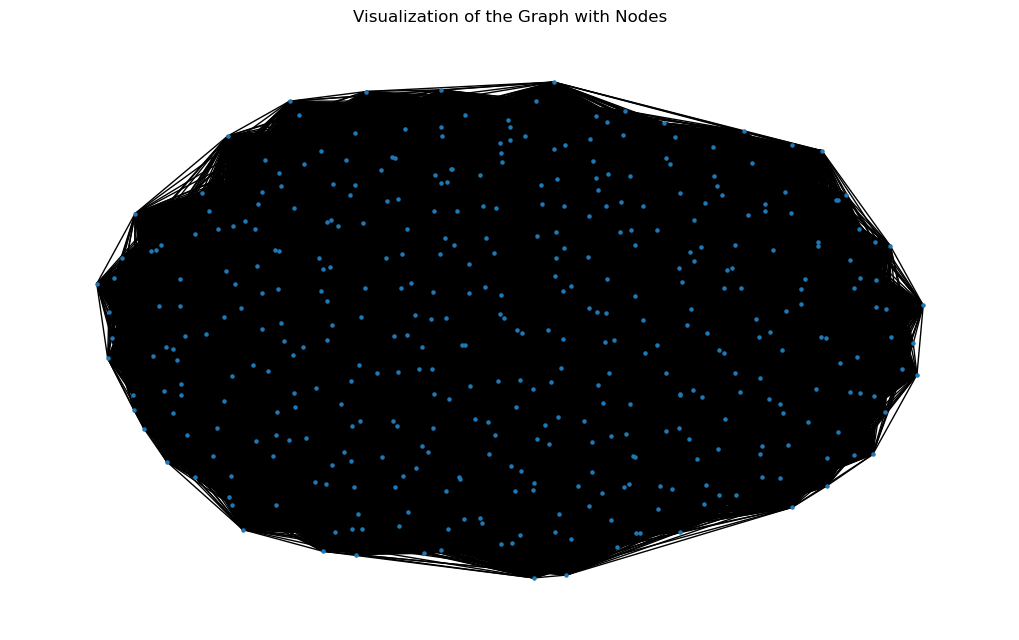

In [577]:
import matplotlib.pyplot as plt
import scipy

plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with Nodes")
plt.show()

In [578]:
# 获取邻接矩阵
Adjacent = nx.adjacency_matrix(G)
print("邻接矩阵:")
print(Adjacent.shape)
# print(Adjacent.todense())

邻接矩阵:
(400, 400)


In [579]:
print(Adjacent.todense())

[[0.         0.01152922 0.02305843 ... 0.28823038 0.29975959 0.31128881]
 [0.01152922 0.         0.01152922 ... 0.28823038 0.28823038 0.29975959]
 [0.02305843 0.01152922 0.         ... 0.27670116 0.28823038 0.28823038]
 ...
 [0.28823038 0.28823038 0.27670116 ... 0.         0.01152922 0.02305843]
 [0.29975959 0.28823038 0.28823038 ... 0.01152922 0.         0.01152922]
 [0.31128881 0.29975959 0.28823038 ... 0.02305843 0.01152922 0.        ]]


In [580]:
total_sum = np.sum(Adjacent.data)

# 对稀疏矩阵中的每个非零元素进行标准化
normalized_adjacent = Adjacent / total_sum

In [581]:
print(np.sum(normalized_adjacent))

0.9999999999999971


In [582]:
print(normalized_adjacent)

  (0, 1)	6.028674041044373e-07
  (0, 2)	1.2057348082088745e-06
  (0, 3)	1.8086022123133123e-06
  (0, 4)	2.411469616417749e-06
  (0, 5)	3.014337020522186e-06
  (0, 6)	3.6172044246266246e-06
  (0, 7)	4.220071828731059e-06
  (0, 8)	4.822939232835498e-06
  (0, 9)	5.425806636939935e-06
  (0, 10)	6.028674041044372e-06
  (0, 11)	6.63154144514881e-06
  (0, 12)	7.234408849253249e-06
  (0, 13)	7.83727625335768e-06
  (0, 14)	8.440143657462118e-06
  (0, 15)	9.04301106156656e-06
  (0, 16)	9.645878465670996e-06
  (0, 17)	1.0248745869775432e-05
  (0, 18)	1.085161327387987e-05
  (0, 19)	1.1454480677984311e-05
  (0, 20)	6.028674041044373e-07
  (0, 21)	6.028674041044373e-07
  (0, 22)	1.2057348082088745e-06
  (0, 23)	1.8086022123133123e-06
  (0, 24)	2.411469616417749e-06
  (0, 25)	3.014337020522186e-06
  :	:
  (399, 374)	3.014337020522186e-06
  (399, 375)	2.411469616417749e-06
  (399, 376)	1.8086022123133123e-06
  (399, 377)	1.2057348082088745e-06
  (399, 378)	6.028674041044373e-07
  (399, 379)	6.0286740

In [583]:
normalized_adjacent = normalized_adjacent * 1e6

In [584]:
print(normalized_adjacent)

  (0, 1)	0.6028674041044373
  (0, 2)	1.2057348082088746
  (0, 3)	1.8086022123133123
  (0, 4)	2.411469616417749
  (0, 5)	3.014337020522186
  (0, 6)	3.6172044246266246
  (0, 7)	4.220071828731059
  (0, 8)	4.822939232835498
  (0, 9)	5.425806636939935
  (0, 10)	6.028674041044372
  (0, 11)	6.631541445148811
  (0, 12)	7.234408849253249
  (0, 13)	7.83727625335768
  (0, 14)	8.440143657462118
  (0, 15)	9.043011061566562
  (0, 16)	9.645878465670997
  (0, 17)	10.248745869775432
  (0, 18)	10.85161327387987
  (0, 19)	11.45448067798431
  (0, 20)	0.6028674041044373
  (0, 21)	0.6028674041044373
  (0, 22)	1.2057348082088746
  (0, 23)	1.8086022123133123
  (0, 24)	2.411469616417749
  (0, 25)	3.014337020522186
  :	:
  (399, 374)	3.014337020522186
  (399, 375)	2.411469616417749
  (399, 376)	1.8086022123133123
  (399, 377)	1.2057348082088746
  (399, 378)	0.6028674041044373
  (399, 379)	0.6028674041044373
  (399, 380)	11.45448067798431
  (399, 381)	10.85161327387987
  (399, 382)	10.248745869775432
  (399, 383

In [585]:
def calLaplacianMatrix(adjacentMatrix):
    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    # print degreeMatrix
    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    # print laplacianMatrix
    # normalize
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [586]:
from sklearn.cluster import KMeans

In [587]:
# Laplacian = calLaplacianMatrix(Adjacent)
Laplacian = calLaplacianMatrix(normalized_adjacent)
x, V = np.linalg.eig(Laplacian)
x = zip(x, range(len(x)))
x = sorted(x, key=lambda x:x[0])
H = np.vstack([V[:,i] for (v, i) in x[:time_value_max * device_value_max]]).T

In [608]:
impact_factor = 2
# 类别过多导致 出现较多单个数据点1类的情况，影响较大
class_number = int(time_value_max * device_value_max / batch_size / impact_factor)
sp_kmeans = KMeans(n_clusters=class_number).fit(H)

In [609]:
labels = sp_kmeans.labels_

In [610]:
nlist = list(G)

In [611]:
print(len(labels))
print(labels)

400
[ 5  8  5 18 19 18  5  5  5 19 10  5  5  5  8  5  5 19  5 17  5 12  5  8
  5  3 18  5  5  5 18 18  5  5 19 12 18  5  7  5  2  5 10  0  5 19  5  5
  5  8 16  5  5 16  5 16  5  5  5 11  5  0  5  5  6 18  5  5  5  3 18  5
  5  1  0  7  2  5  5  5  5 15  5  5 18 12  5  3  5 11  5  5 16  5 11 18
  5 18  5 18 18  5  9  5  5  5 18 18 18  8 10  5  5  5  5 10  5  5  5 18
  5  5  5  5  5 18  5  5 19  5  5  5  5 19  5  5 12  5 18 16 12  5  5 18
  5  5  5  6 18  5  8 18 19 18 12  5  5 15 19  5 18  5  5  4 15  5  6  5
  5 19  5 14  5  5  5 19  5  5  5  5 17  6 19  3  8 18 15  5  5  5  5  5
 16 10  5  5  5  5  5 18 17  8  6 18  5 11 18  5 18  5 16  8  5  5  5  5
  5  5  5  5 19  5  5  5  5 17  5  5 12  8  5 15  5 19  5  5  5  5  4  5
  2  5  5  5  5 18 19 17  5  5 18  5  6 18  5 18 19  3 18  5  5 18  5  5
 18  5 16 19  5  5  5  8 12  5  6 13 11  5  5  5  5  5  5 18  6  5  5  8
 18  5  5 18 19  7 11  5 18  8 16  5  5  5  4  5  5  5 18 17  5  5 18 19
 15  8  5  5  5  5 15  5 18  5 18 15 18  5 10  

In [612]:
# 验证分到同一个类别的点，是否大部分都在同一个query中出现

num_query = len(query_set)
num_class = class_number

for i in nlist:
    attributes = G.nodes[i]
    print(f"节点 {i}: timestamp = {attributes['timestamp']}, device_id = {attributes['device_id']}, class = {labels[i]}")

节点 0: timestamp = 1, device_id = 1, class = 5
节点 1: timestamp = 1, device_id = 2, class = 8
节点 2: timestamp = 1, device_id = 3, class = 5
节点 3: timestamp = 1, device_id = 4, class = 18
节点 4: timestamp = 1, device_id = 5, class = 19
节点 5: timestamp = 1, device_id = 6, class = 18
节点 6: timestamp = 1, device_id = 7, class = 5
节点 7: timestamp = 1, device_id = 8, class = 5
节点 8: timestamp = 1, device_id = 9, class = 5
节点 9: timestamp = 1, device_id = 10, class = 19
节点 10: timestamp = 1, device_id = 11, class = 10
节点 11: timestamp = 1, device_id = 12, class = 5
节点 12: timestamp = 1, device_id = 13, class = 5
节点 13: timestamp = 1, device_id = 14, class = 5
节点 14: timestamp = 1, device_id = 15, class = 8
节点 15: timestamp = 1, device_id = 16, class = 5
节点 16: timestamp = 1, device_id = 17, class = 5
节点 17: timestamp = 1, device_id = 18, class = 19
节点 18: timestamp = 1, device_id = 19, class = 5
节点 19: timestamp = 1, device_id = 20, class = 17
节点 20: timestamp = 2, device_id = 1, class = 5
节点 21

In [613]:
node_label_dict = {}
for i in range(len(nlist)):
    node_label_dict[nlist[i]] = labels[i]

In [614]:
from collections import Counter

# 统计列表中每个数字的数量
number_counts = Counter(labels)

class_counts = []
# 打印结果
for number in range(class_number):
    count = number_counts.get(number, 0)
    class_counts.append(count)
    print(f"类别 {number} 中包含数据点数：{count}")

类别 0 中包含数据点数：3
类别 1 中包含数据点数：1
类别 2 中包含数据点数：6
类别 3 中包含数据点数：6
类别 4 中包含数据点数：3
类别 5 中包含数据点数：215
类别 6 中包含数据点数：9
类别 7 中包含数据点数：3
类别 8 中包含数据点数：19
类别 9 中包含数据点数：1
类别 10 中包含数据点数：7
类别 11 中包含数据点数：7
类别 12 中包含数据点数：8
类别 13 中包含数据点数：1
类别 14 中包含数据点数：1
类别 15 中包含数据点数：11
类别 16 中包含数据点数：14
类别 17 中包含数据点数：6
类别 18 中包含数据点数：56
类别 19 中包含数据点数：23


In [615]:
class_counts

[3, 1, 6, 6, 3, 215, 9, 3, 19, 1, 7, 7, 8, 1, 1, 11, 14, 6, 56, 23]

In [616]:
# 将数据按照bacth进行存储，观察效率问题


# 1. 按照正常的顺序，即按照1s内10个设备的数据为 batch 进行存储

# 2. 按照上述聚类的结果进行batch打包存储，自上而下，从类别0到类别19 进行打包

# 3. 验证效率 
# 3.1 用B+树进行存储 B+树的数据全都是存在最底层的，所以只需要把数据按照Batch分类，并计算一个查询对应两种Batch方式，共需要到几个Batch中获取数据
# 3.2 用R树进行存储 R树的存储 也是要落实到最底层获取数据，所以其实跟B+树计算方式没有区别

# 4. 一共有600个数据点，分成60个数据包，60个数据包存储到10个随机生成的不同的存储节点中，得到（数据包，存储节点）的映射关系，计算获取一次查询按照2种方式存储 所需的总的时间差

# device_ids = data_aggregated.columns.tolist()[1:device_value_max + 1]
import copy

batch_1_dict = {}
batch = 1
for i in range(0, len(nlist), batch_size):
    batch_list = []
    for j in range(i, min(i + batch_size, len(nlist))):
        attributes = G.nodes[nlist[j]]
        time = attributes['timestamp']
        device_id = attributes['device_id']
        batch_list.append((time, device_id))
    batch_1_dict[batch] = copy.deepcopy(batch_list)
    batch += 1

assert (batch == int(time_value_max * device_value_max / batch_size) + 1)

In [617]:
batch_1_dict

{1: [(1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10)],
 2: [(1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17),
  (1, 18),
  (1, 19),
  (1, 20)],
 3: [(2, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (2, 7),
  (2, 8),
  (2, 9),
  (2, 10)],
 4: [(2, 11),
  (2, 12),
  (2, 13),
  (2, 14),
  (2, 15),
  (2, 16),
  (2, 17),
  (2, 18),
  (2, 19),
  (2, 20)],
 5: [(3, 1),
  (3, 2),
  (3, 3),
  (3, 4),
  (3, 5),
  (3, 6),
  (3, 7),
  (3, 8),
  (3, 9),
  (3, 10)],
 6: [(3, 11),
  (3, 12),
  (3, 13),
  (3, 14),
  (3, 15),
  (3, 16),
  (3, 17),
  (3, 18),
  (3, 19),
  (3, 20)],
 7: [(4, 1),
  (4, 2),
  (4, 3),
  (4, 4),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (4, 10)],
 8: [(4, 11),
  (4, 12),
  (4, 13),
  (4, 14),
  (4, 15),
  (4, 16),
  (4, 17),
  (4, 18),
  (4, 19),
  (4, 20)],
 9: [(5, 1),
  (5, 2),
  (5, 3),
  (5, 4),
  (5, 5),
  (5, 6),
  (5, 7),
  (5, 8),
  (5, 9),
  (5, 10)],
 10: [(5, 11),
  (5

In [618]:
# 按照谱聚类算法得到的结果进行Batch得到batch_2_dict
# node_label_dict 存储了映射关系，编号为i的node对应哪一类
# 计算每个类别的起始和结束编号
import copy
batch_2_dict = {i: [] for i in range(1, int(time_value_max * device_value_max / batch_size) + 1)}
class_indices = []
start = 0
for size in class_counts:
    end = start + size
    class_indices.append((copy.deepcopy(start), copy.deepcopy(end)))
    start = end
# 遍历类别
for class_index, (start, end) in enumerate(class_indices):
    # 获取当前类别的所有点的编号
    # node为G中的编号，label为谱聚类算法得到的类别
    # 每次循环，得到某一类class的所有points
    class_points = [node for node, label in enumerate(labels) if label == class_index]
    # 遍历当前类别的所有点
    for idx, node in enumerate(class_points):
        # 计算当前点应该分配到的 Batch 编号
        batch_index = (start + idx) // batch_size
        # 将当前点添加到对应的 Batch 中
        vTime = node % time_value_max + 1
        vDevice = node // time_value_max + 1
        batch_2_dict[batch_index + 1].append((vTime, vDevice))
print(batch_2_dict)

{1: [(4, 3), (2, 4), (15, 4), (14, 4), (1, 3), (17, 4), (1, 13), (8, 19), (19, 19), (13, 20)], 2: [(6, 2), (10, 4), (8, 5), (4, 10), (18, 13), (20, 20), (4, 9), (19, 12), (3, 16), (1, 1)], 3: [(3, 1), (7, 1), (8, 1), (9, 1), (12, 1), (13, 1), (14, 1), (16, 1), (17, 1), (19, 1)], 4: [(1, 2), (3, 2), (5, 2), (8, 2), (9, 2), (10, 2), (13, 2), (14, 2), (18, 2), (20, 2)], 5: [(2, 3), (5, 3), (7, 3), (8, 3), (9, 3), (12, 3), (13, 3), (15, 3), (17, 3), (18, 3)], 6: [(19, 3), (1, 4), (3, 4), (4, 4), (7, 4), (8, 4), (9, 4), (12, 4), (13, 4), (18, 4)], 7: [(19, 4), (20, 4), (1, 5), (3, 5), (4, 5), (7, 5), (9, 5), (11, 5), (12, 5), (14, 5)], 8: [(17, 5), (19, 5), (2, 6), (4, 6), (5, 6), (6, 6), (12, 6), (13, 6), (14, 6), (15, 6)], 9: [(17, 6), (18, 6), (19, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (7, 7), (8, 7)], 10: [(10, 7), (11, 7), (12, 7), (13, 7), (15, 7), (16, 7), (18, 7), (2, 8), (3, 8), (5, 8)], 11: [(6, 8), (7, 8), (10, 8), (16, 8), (17, 8), (20, 8), (2, 9), (3, 9), (6, 9), (8, 9)],

In [619]:
# 模拟存储节点
# 每个store_node 包含3个信息，distance|storage space|reputation, 并计算得到一个score
store_node_num = 50
store_node = {i: {'distance': 0, 'storage space': 0, 'reputation': 0, 'score': 0, 'batches': []} for i in range(1, store_node_num + 1)}

mean = 80  # 均值
std_dev = 30  # 标准差
gaussian_distances = np.random.normal(mean, std_dev, store_node_num)  # 生成 10 个高斯分布的distance
gaussian_reputations = np.random.normal(80, 5, store_node_num)  # 生成 10 个高斯分布的distance
gaussian_storage_spaces = np.random.normal(80, 5, store_node_num)  # 生成 10 个高斯分布的distance

# 循环遍历每个节点，为其设置高斯分布的距离
for key, node in store_node.items():
    node['distance'] = gaussian_distances[key - 1]
    node['reputation'] = gaussian_reputations[key - 1]
    node['storage space'] = gaussian_storage_spaces[key - 1]
    node['score'] =  100 - node['distance'] + node['reputation'] + node['storage space']
    print(node['score'])
print(store_node)

177.8339582054727
240.70482305392392
202.31993897357694
200.9506446496884
193.70658879766128
208.71865620256807
117.01514245058037
239.80523139698028
212.0226409405622
115.93351744208293
136.1881137020336
165.21582881421767
162.6541861986213
195.83256378827633
168.0833869019403
185.09485989499063
141.4287138004862
176.93208265020286
152.6096463212895
173.07345453426808
224.25121205792254
183.48718871994112
191.81575328335998
198.0563682254956
154.81718089945554
182.07878441344695
223.11734081364062
180.38541915865352
118.69167678909022
153.11563659124698
171.42469115878384
168.70456896655494
219.5356785504717
225.708298950014
184.44504435008417
133.66635730891565
183.6796063910603
216.59714069886226
178.26822175796497
167.82847283032686
153.31781570660678
156.47325375213714
173.64237875395918
154.530484907911
212.38945589661466
173.50442987843402
221.5042086652627
205.60802533421966
179.5961151800421
180.2202239327042
{1: {'distance': 80.30479711411999, 'storage space': 74.393533702384

In [620]:
# 从score前5的node中随机选取一个
import random
# batch_1_dict
for idx in range(1, int(time_value_max * device_value_max / batch_size)+ 1):
    sorted_nodes = sorted(store_node.items(), key=lambda x: x[1]['score'], reverse=True)
    # 从得分前五的节点中随机选择一个节点
    top_five_nodes = sorted_nodes[:5]
    random_node = random.choice(top_five_nodes)
    # store_node进行存储
    store_node[random_node[0]]['batches'].append((idx, [(vTime, vDevice) for (vTime, vDevice) in batch_1_dict[idx]]))
    # store_node更新score
    # store_node[random_node[0]]['storage space'] -= 10

In [621]:
print(store_node)

{1: {'distance': 80.30479711411999, 'storage space': 74.39353370238452, 'reputation': 83.74522161720817, 'score': 177.8339582054727, 'batches': []}, 2: {'distance': 14.017970584676704, 'storage space': 76.60972296515807, 'reputation': 78.11307067344252, 'score': 240.70482305392392, 'batches': [(6, [(3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20)]), (7, [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10)]), (8, [(4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20)]), (13, [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10)]), (24, [(12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (12, 19), (12, 20)]), (33, [(17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10)])]}, 3: {'distance': 66.91210192465763, 'storage space': 86.05177579521305, 'reputation': 83.18026510302154, 'score': 202.31993897

In [622]:
# 对100个query进行处理，得到每个query需要到几个store node中取数据，每个store node中要取几个数据，最终需要多久的时间取得数据
def get_batch_id(t, d, batch_dict):
    for batch_id, batch_list in batch_dict.items():
        for tup in batch_list:
            if t == tup[0] and d == tup[1]:
                return batch_id

# 该函数暂时无用
def get_batch_id_by_point(point, batch_dict):
    return point

def get_store_node_id(batch_id, store_node):
    for k, node_dict in store_node.items():
        for batch_tup in node_dict['batches']:
            if batch_tup[0] == batch_id:
                return k

def cal_time(nodes):
    time_tuples = {}
    for node in nodes:
        for node_id, node_dict in store_node.items():
            if node == node_id:
                time_cons = node_dict['distance'] * 0.010756
                if time_tuples.get(node_id) is None:
                    time_tuples[node_id] = time_cons
                elif time_cons > time_tuples[node_id]:
                    time_tuples[node_id] = time_cons
    time_max = 0
    for node_id, time_cons in time_tuples.items():
        if time_cons > time_max:
            time_max = time_cons
    return time_max

共需要访问7个batch
{12, 14, 16, 18, 20, 22, 24}
共需要访问4个node
[21, 8, 27, 8, 8, 8, 2]
访问时间为0.4402998354325319s
共需要访问7个batch
{7, 9, 11, 13, 15, 17, 19}
共需要访问4个node
[2, 27, 27, 2, 21, 27, 34]
访问时间为0.4402998354325319s
共需要访问7个batch
{17, 19, 21, 23, 25, 27, 29}
共需要访问4个node
[27, 34, 21, 8, 27, 8, 27]
访问时间为0.4402998354325319s
共需要访问6个batch
{35, 36, 37, 38, 39, 40}
共需要访问4个node
[8, 21, 34, 27, 34, 8]
访问时间为0.4402998354325319s
共需要访问3个batch
{2, 4, 6}
共需要访问3个node
[21, 27, 2]
访问时间为0.4402998354325319s
共需要访问7个batch
{19, 21, 23, 25, 27, 29, 31}
共需要访问4个node
[34, 21, 8, 27, 8, 27, 8]
访问时间为0.4402998354325319s
共需要访问6个batch
{1, 2, 3, 4, 5, 6}
共需要访问5个node
[34, 21, 8, 27, 27, 2]
访问时间为0.4402998354325319s
共需要访问7个batch
{14, 16, 18, 20, 22, 24, 26}
共需要访问3个node
[8, 27, 8, 8, 8, 2, 8]
访问时间为0.4402998354325319s
共需要访问7个batch
{33, 35, 23, 25, 27, 29, 31}
共需要访问3个node
[2, 8, 8, 27, 8, 27, 8]
访问时间为0.4402998354325319s
共需要访问3个batch
{40, 36, 38}
共需要访问3个node
[8, 21, 27]
访问时间为0.4402998354325319s
共需要访问5个batch
{9, 11, 13, 15, 17}
共需要访问3个

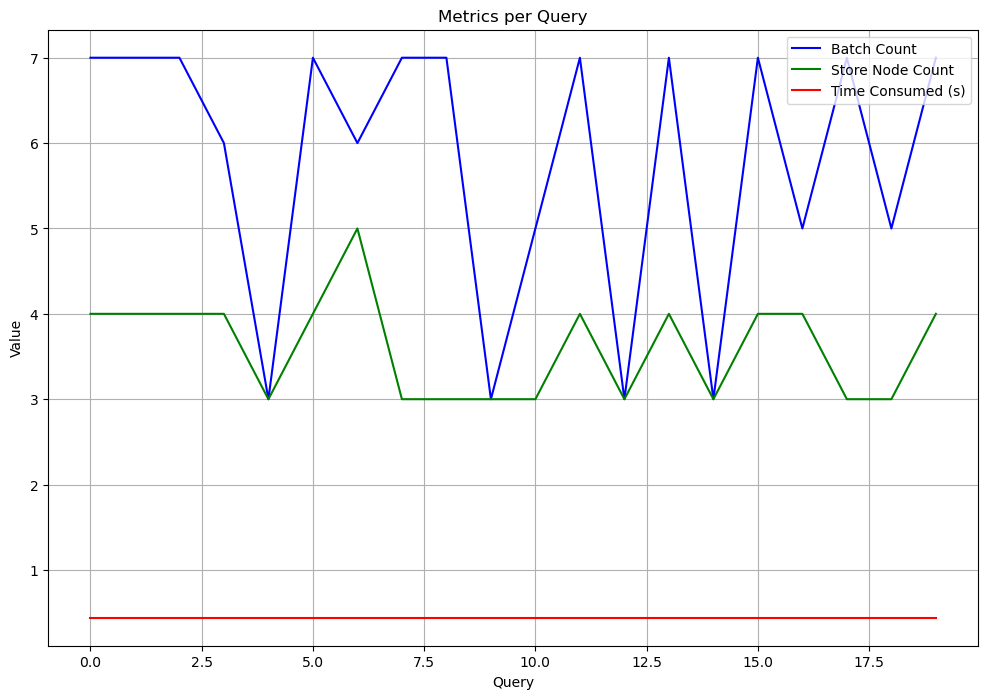

In [623]:
batch_nums = []
node_nums = []
time_consumed_list = []

for query in query_set:
    time_l, time_h = query[0][0], query[0][1]
    device_l, device_h = query[1][0], query[1][1]
    batches = set()
    nodes = []
    # 找到每一个point所在的batch编号
    for t in range(time_l, time_h + 1):
        for d in range(device_l, device_h + 1):
            # 由 t, d 得到 point 编号
            point = (d - 1) * batch_size + t - 1 
            # 由 point 得到 batch 编号
            batches.add(get_batch_id(t, d, batch_1_dict))
    
    # 指标1: 统计 batch 总数 
    batch_num = len(batches)
    batch_nums.append(batch_num)
    print(f"共需要访问{batch_num}个batch")
    print(batches)
    # 根据batch编号得到其所在的store node
    for batch_id in batches:
        store_node_id = get_store_node_id(batch_id, store_node)
        nodes.append(store_node_id)

    # 指标2: 统计 store node 总数
    node_num = len(list(set(nodes)))
    node_nums.append(node_num)
    print(f"共需要访问{node_num}个node")
    print(nodes)
    # 指标3: 计算总那个时间消耗
    time_consumed = cal_time(nodes)
    time_consumed_list.append(time_consumed)
    print(f"访问时间为{time_consumed}s")
    
queries = range(len(query_set))

plt.figure(figsize=(12, 8))

# 绘制batch总数的图表
plt.plot(queries, batch_nums, label='Batch Count', color='blue')

# 绘制store node总数的图表
plt.plot(queries, node_nums, label='Store Node Count', color='green')

# 绘制总时间消耗的图表
plt.plot(queries, time_consumed_list, label='Time Consumed (s)', color='red')

plt.xlabel('Query')
plt.ylabel('Value')
plt.title('Metrics per Query')
plt.legend()
plt.grid(True)
plt.show()

In [624]:
for key, node in store_node.items():
    node['batches'].clear() 

In [625]:
# 将60个Batch存到10个store node中，从score前5的node中随机选取一个
import random
# batch_2_dict
for idx in range(1, int(time_value_max * device_value_max / batch_size) + 1):
    sorted_nodes = sorted(store_node.items(), key=lambda x: x[1]['score'], reverse=True)
    # 从得分前五的节点中随机选择一个节点
    top_five_nodes = sorted_nodes[:5]
    random_node = random.choice(top_five_nodes)
    # store_node进行存储
    store_node[random_node[0]]['batches'].append((idx, [(vTime, vDevice) for (vTime, vDevice) in batch_2_dict[idx]]))
    # store_node更新score
    # store_node[random_node[0]]['storage space'] -= 10

In [626]:
print(store_node)

{1: {'distance': 80.30479711411999, 'storage space': 74.39353370238452, 'reputation': 83.74522161720817, 'score': 177.8339582054727, 'batches': []}, 2: {'distance': 14.017970584676704, 'storage space': 76.60972296515807, 'reputation': 78.11307067344252, 'score': 240.70482305392392, 'batches': [(2, [(6, 2), (10, 4), (8, 5), (4, 10), (18, 13), (20, 20), (4, 9), (19, 12), (3, 16), (1, 1)]), (8, [(17, 5), (19, 5), (2, 6), (4, 6), (5, 6), (6, 6), (12, 6), (13, 6), (14, 6), (15, 6)]), (16, [(17, 12), (18, 12), (20, 12), (2, 13), (3, 13), (4, 13), (5, 13), (9, 13), (10, 13), (12, 13)]), (18, [(18, 14), (19, 14), (20, 14), (1, 15), (2, 15), (3, 15), (6, 15), (7, 15), (10, 15), (11, 15)]), (24, [(14, 20), (15, 20), (17, 20), (18, 20), (5, 4), (8, 8), (7, 9), (2, 10), (3, 11), (13, 13)]), (25, [(15, 14), (5, 15), (18, 18), (19, 2), (16, 4), (14, 15), (2, 1), (15, 1), (4, 2), (10, 3)]), (26, [(10, 6), (11, 8), (5, 10), (2, 11), (12, 11), (10, 12), (12, 14), (8, 15), (18, 15), (14, 16)]), (32, [(1

time_l: 6, time_h: 12
device_l: 14, device_h: 14
point: 113
batch_got: 17
point: 133
batch_got: 31
point: 153
batch_got: 40
point: 173
batch_got: 17
point: 193
batch_got: 17
point: 213
batch_got: 17
point: 233
batch_got: 26
共需要访问4个batch
{40, 17, 26, 31}
共需要访问3个node
[2, 27, 2, 34]
访问时间为0.4402998354325319s
time_l: 4, time_h: 10
device_l: 6, device_h: 6
point: 65
batch_got: 8
point: 85
batch_got: 8
point: 105
batch_got: 8
point: 125
batch_got: 34
point: 145
batch_got: 34
point: 165
batch_got: 34
point: 185
batch_got: 26
共需要访问3个batch
{8, 34, 26}
共需要访问2个node
[2, 21, 2]
访问时间为0.39167266639834053s
time_l: 9, time_h: 15
device_l: 8, device_h: 8
point: 167
batch_got: 35
point: 187
batch_got: 11
point: 207
batch_got: 26
point: 227
batch_got: 35
point: 247
batch_got: 39
point: 267
batch_got: 35
point: 287
batch_got: 29
共需要访问5个batch
{35, 39, 11, 26, 29}
共需要访问4个node
[34, 27, 21, 2, 34]
访问时间为0.4402998354325319s
time_l: 18, time_h: 20
device_l: 9, device_h: 11
point: 348
batch_got: 12
point: 349
batch

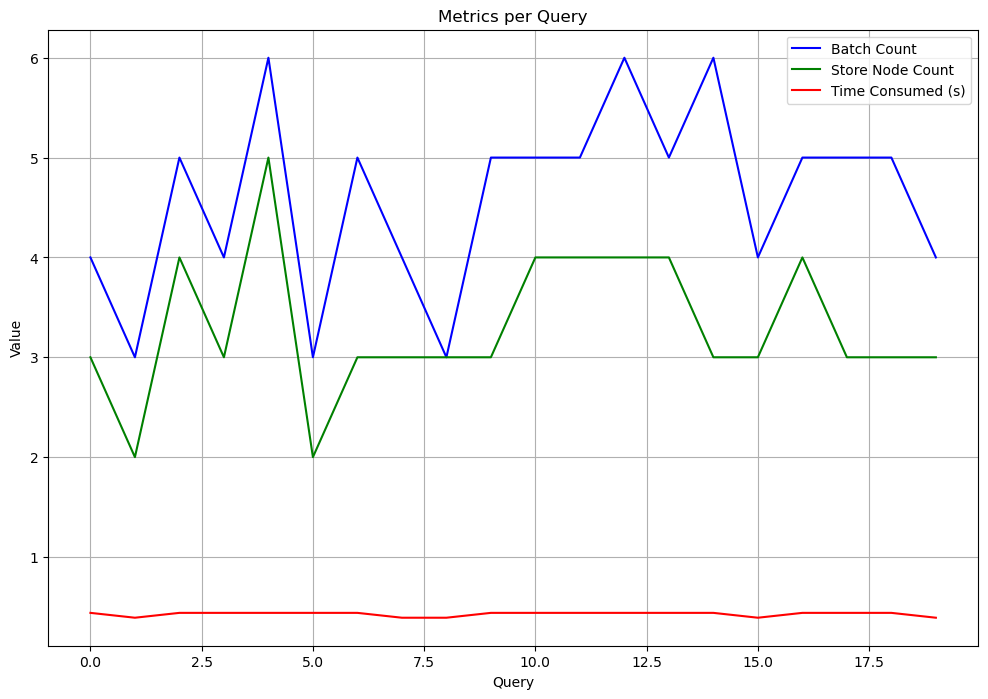

In [627]:
batch_nums = []
node_nums = []
time_consumed_list = []
for query in query_set:
    # print(query)
    time_l, time_h = query[0][0], query[0][1]
    device_l, device_h = query[1][0], query[1][1]
    print(f"time_l: {time_l}, time_h: {time_h}")
    print(f"device_l: {device_l}, device_h: {device_h}")
    batches = set()
    nodes = []
    # 找到每一个point所在的batch编号
    for t in range(time_l, time_h + 1):
        for d in range(device_l, device_h + 1):
            # 由 t, d 得到 point 编号
            point = (t - 1) * device_value_max + d - 1
            print(f"point: {point}")
            # 由 point 得到 batch 编号
            batch_got = get_batch_id(t, d, batch_2_dict)
            print(f"batch_got: {batch_got}")
            batches.add(copy.deepcopy(batch_got))
    
    # 指标1: 统计 batch 总数 
    batch_num = len(batches)
    batch_nums.append(batch_num)
    print(f"共需要访问{batch_num}个batch")
    print(batches)
    # 根据batch编号得到其所在的store node
    for batch_id in batches:
        store_node_id = get_store_node_id(batch_id, store_node)
        nodes.append(store_node_id)

    # 指标2: 统计 store node 总数
    node_num = len(list(set(nodes)))
    node_nums.append(node_num)
    
    print(f"共需要访问{node_num}个node")
    print(nodes)
    # 指标3: 计算总那个时间消耗
    time_consumed = cal_time(nodes)
    time_consumed_list.append(time_consumed)
    print(f"访问时间为{time_consumed}s")
    
queries = range(len(query_set))

plt.figure(figsize=(12, 8))

# 绘制batch总数的图表
plt.plot(queries, batch_nums, label='Batch Count', color='blue')

# 绘制store node总数的图表
plt.plot(queries, node_nums, label='Store Node Count', color='green')

# 绘制总时间消耗的图表
plt.plot(queries, time_consumed_list, label='Time Consumed (s)', color='red')

plt.xlabel('Query')
plt.ylabel('Value')
plt.title('Metrics per Query')
plt.legend()
plt.grid(True)
plt.show()